In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Admission_Prediction.csv')

In [3]:
dt.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [4]:
# Analyzing the data structure
dt.shape

(500, 9)

In [5]:
# Understanding the data at high level and checking the statistics of the dataset
dt.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Fill the null values in the dataset
dt['University Rating']=dt['University Rating'].fillna(dt['University Rating'].mode()[0])
dt['TOEFL Score']=dt['TOEFL Score'].fillna(dt['TOEFL Score'].mean())
dt['GRE Score']=dt['GRE Score'].fillna(dt['GRE Score'].mean())

In [7]:
# Verifying if NAN values are filled
dt.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Dropping the unwanted columns
dt=dt.drop(columns=['Serial No.'])
dt

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


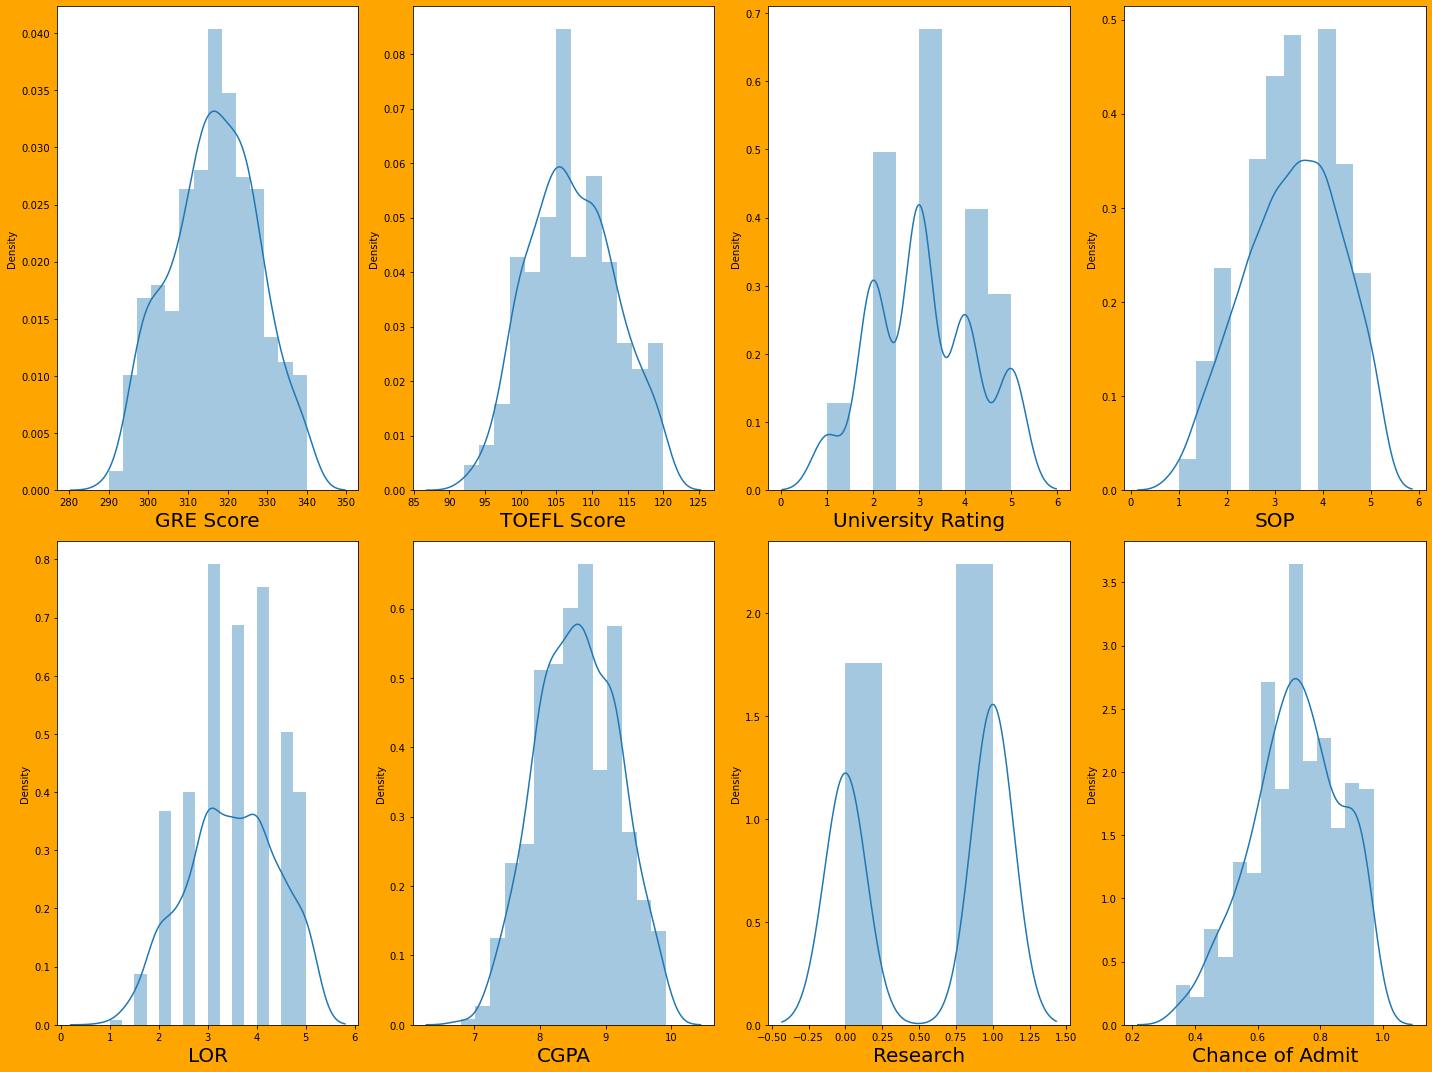

In [9]:
# The data distribution have to be analyzed
plt.figure(figsize=(20,15), facecolor='orange')
plotnumber=1
for column in dt:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
# As University Rating, Reseach is catagorical variables it may not be in standard distribution where bell curve may not be expected.

In [11]:
# To observed the relationship between independent and dependent variables
X=dt.drop(columns=['Chance of Admit'])
y=dt['Chance of Admit']

In [12]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

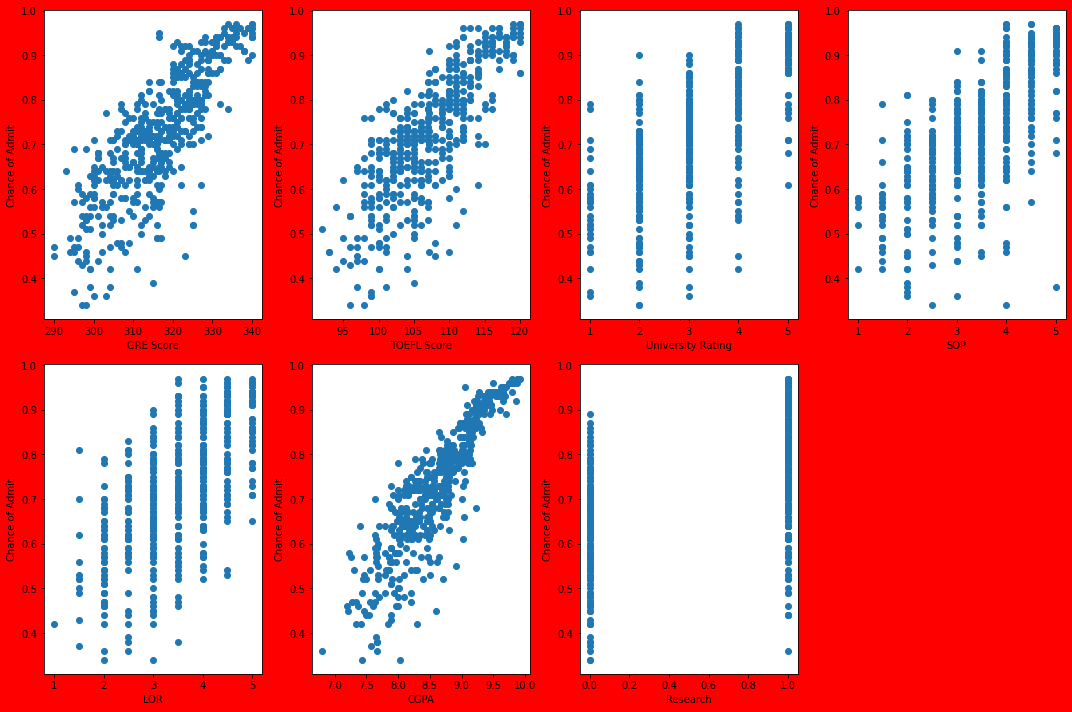

In [14]:
# Visualizing relationship
plt.figure(figsize=(15,10), facecolor='red')
plotnumber=1

for column in X:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Chance of Admit', fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [15]:
# Data scaling of the trained data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [16]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [17]:
# Split data into train and test. Model will be built 
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y, test_size = 0.25, random_state=49)
y_train.head()

401    0.66
221    0.75
110    0.61
76     0.74
195    0.78
Name: Chance of Admit, dtype: float64

In [18]:
re=LinearRegression()
re.fit(x_train,y_train)

LinearRegression()

In [19]:
re.predict(scaler.transform([[312.0, 103.0, 4.0, 4.0, 5.0, 8.43, 0]]))

array([0.70551753])

In [20]:
re.score(x_train,y_train)

0.8145910304382725

In [21]:
re.score(x_test,y_test)

0.8377796652353541

In [22]:
y_pred=re.predict(x_test)

In [23]:
y_pred

array([0.77592728, 0.82189355, 0.53237459, 0.53158915, 0.71913576,
       0.78296644, 0.67493981, 0.71765858, 0.95026714, 0.51343088,
       0.82749034, 0.65490214, 0.65336809, 0.69515263, 0.67870849,
       0.68422187, 0.77066709, 0.69587358, 0.61306985, 0.91270759,
       0.83613353, 0.5101666 , 0.62095565, 0.90970737, 0.67081486,
       0.91154893, 0.52166984, 0.61229555, 0.85070914, 0.83034104,
       0.50493884, 0.73415525, 0.76966228, 0.61102598, 0.79870804,
       0.58112644, 0.75399139, 0.84620015, 0.86249992, 0.75216791,
       0.65235971, 0.96012442, 0.66118549, 0.6427768 , 0.6556939 ,
       0.50748275, 0.68440277, 0.61035881, 0.51200968, 0.73397561,
       0.76162862, 0.89663454, 0.58197652, 0.9320727 , 0.59682293,
       0.71741367, 0.94389341, 0.76641482, 0.59803781, 0.78678587,
       0.76864083, 0.69049847, 0.74159936, 0.85564167, 0.77807617,
       0.74212136, 0.69536291, 0.73242447, 0.99167787, 0.96534931,
       0.66420324, 0.65200556, 0.75069108, 0.73163753, 0.67942

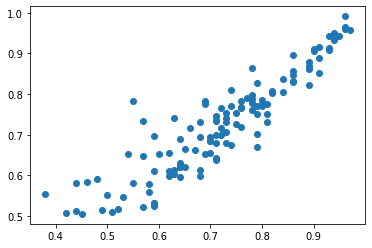

In [24]:
plt.scatter(y_test,y_pred)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mean_absolute_error(y_test, y_pred)

0.039094962124450475

In [26]:
mean_absolute_percentage_error (y_test, y_pred)

0.0625359116230528

In [27]:
mean_absolute_error(y_test, y_pred)

0.039094962124450475

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.05528041060596194

In [38]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [42]:
# LassoCV will retrun best alpha value after max iteration
# Normilize is subtracting the mean and dividing 
lassocv= LassoCV(alphas=None, max_iter=100, normalize=True)
lassocv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [44]:
alpha=lassocv.alpha_
alpha

2.4249979092466713e-05

In [47]:
# for knowing the best parameter
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=2.4249979092466713e-05)

In [49]:
lasso_reg.score(x_test, y_test)

0.8377701661591364

In [51]:
# Using ridge 
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize=True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [52]:
ridgecv.alpha_

0.020999999999999998

In [53]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.020999999999999998)

In [54]:
ridge_model.score(x_test, y_test)

0.8377744626802441